In [1]:
import pandas as pd
import glob

# Load all demographic files
demo_files = glob.glob("demo_*.csv")
demo_df = pd.concat([pd.read_csv(f) for f in demo_files], ignore_index=True)

# Load all enrolment files
enrol_files = glob.glob("enrol_*.csv")
enrol_df = pd.concat([pd.read_csv(f) for f in enrol_files], ignore_index=True)

print("Demographic shape:", demo_df.shape)
print("Enrolment shape:", enrol_df.shape)

print("\nDemographic columns:\n", demo_df.columns)
print("\nEnrolment columns:\n", enrol_df.columns)


Demographic shape: (2071700, 6)
Enrolment shape: (1006029, 7)

Demographic columns:
 Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')

Enrolment columns:
 Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')


In [3]:
# Convert date column using Indian format (DD-MM-YYYY)
demo_df['date'] = pd.to_datetime(demo_df['date'], dayfirst=True)
enrol_df['date'] = pd.to_datetime(enrol_df['date'], dayfirst=True)

# Add year column
demo_df['year'] = demo_df['date'].dt.year
enrol_df['year'] = enrol_df['date'].dt.year

# Create total columns
enrol_df['total_enrolment'] = enrol_df['age_0_5'] + enrol_df['age_5_17'] + enrol_df['age_18_greater']
demo_df['total_updates'] = demo_df['demo_age_5_17'] + demo_df['demo_age_17_']

# Check
enrol_df[['year','total_enrolment']].head(), demo_df[['year','total_updates']].head()


(   year  total_enrolment
 0  2025              109
 1  2025               86
 2  2025              123
 3  2025              106
 4  2025               51,
    year  total_updates
 0  2025            578
 1  2025            397
 2  2025            830
 3  2025            338
 4  2025            830)

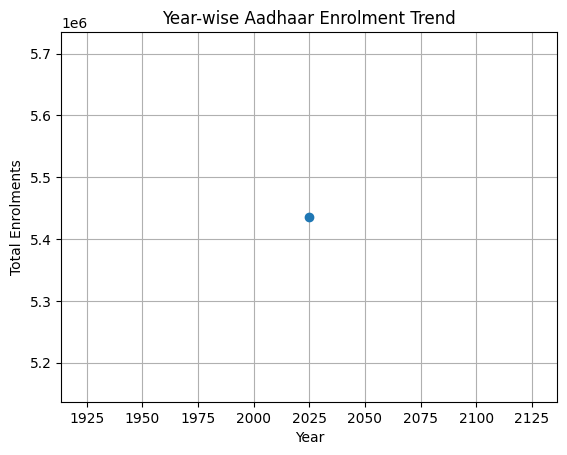

In [5]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

yearly_enrol = enrol_df.groupby('year')['total_enrolment'].sum()

plt.figure()
yearly_enrol.plot(kind='line', marker='o')
plt.title("Year-wise Aadhaar Enrolment Trend")
plt.xlabel("Year")
plt.ylabel("Total Enrolments")
plt.grid(True)
plt.show()


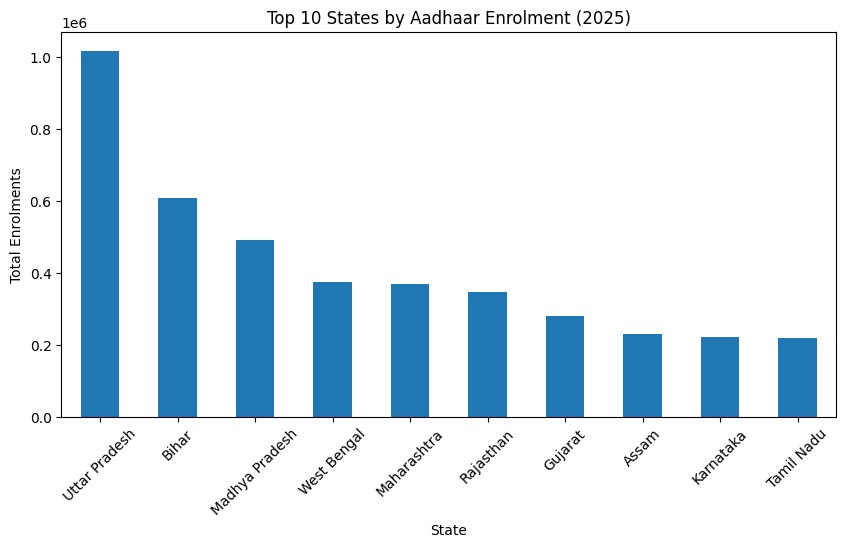

In [6]:
#State-wise Top 10 Enrolment
state_enrol = enrol_df.groupby('state')['total_enrolment'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
state_enrol.plot(kind='bar')
plt.title("Top 10 States by Aadhaar Enrolment (2025)")
plt.xlabel("State")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=45)
plt.show()



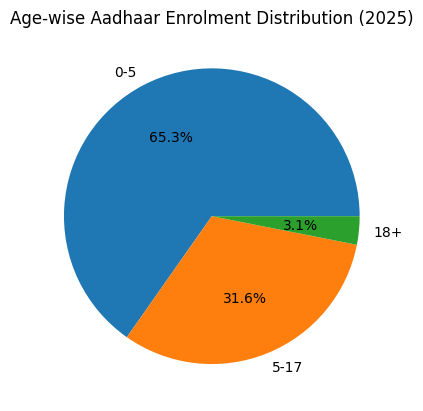

In [7]:
#Age Group Distribution (Pie Chart)
age_totals = {
    "0-5": enrol_df['age_0_5'].sum(),
    "5-17": enrol_df['age_5_17'].sum(),
    "18+": enrol_df['age_18_greater'].sum()
}

plt.figure()
plt.pie(age_totals.values(), labels=age_totals.keys(), autopct='%1.1f%%')
plt.title("Age-wise Aadhaar Enrolment Distribution (2025)")
plt.show()


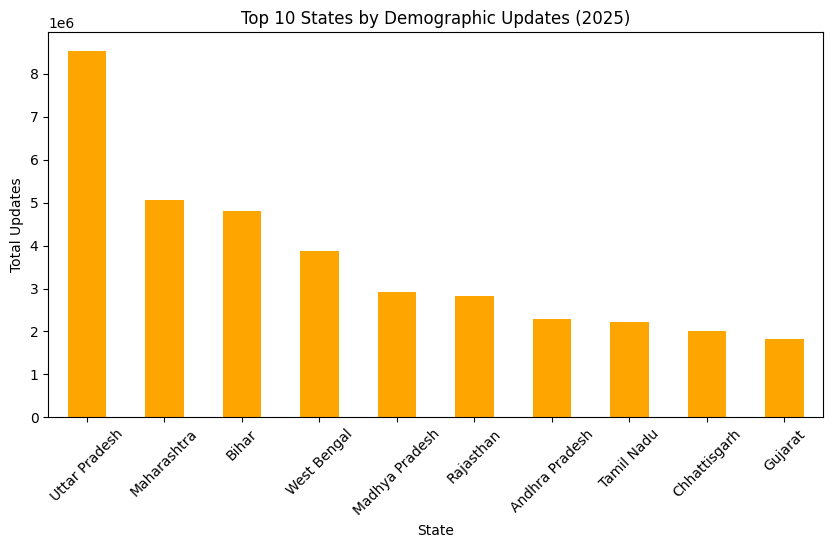

In [8]:
#State-wise Demographic Updates (Top 10)

state_updates = demo_df.groupby('state')['total_updates'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
state_updates.plot(kind='bar', color='orange')
plt.title("Top 10 States by Demographic Updates (2025)")
plt.xlabel("State")
plt.ylabel("Total Updates")
plt.xticks(rotation=45)
plt.show()


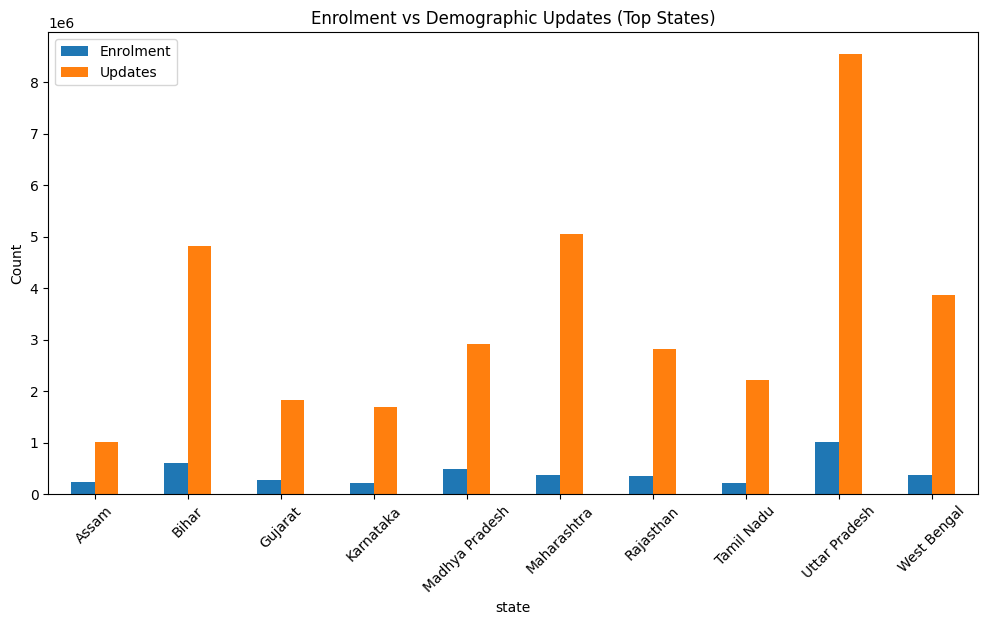

In [9]:
#Enrolment vs Updates Comparison (Top 10 States)

top_states = state_enrol.index

enrol_top = enrol_df[enrol_df['state'].isin(top_states)].groupby('state')['total_enrolment'].sum()
update_top = demo_df[demo_df['state'].isin(top_states)].groupby('state')['total_updates'].sum()

compare_df = pd.DataFrame({
    'Enrolment': enrol_top,
    'Updates': update_top
})

compare_df.plot(kind='bar', figsize=(12,6))
plt.title("Enrolment vs Demographic Updates (Top States)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


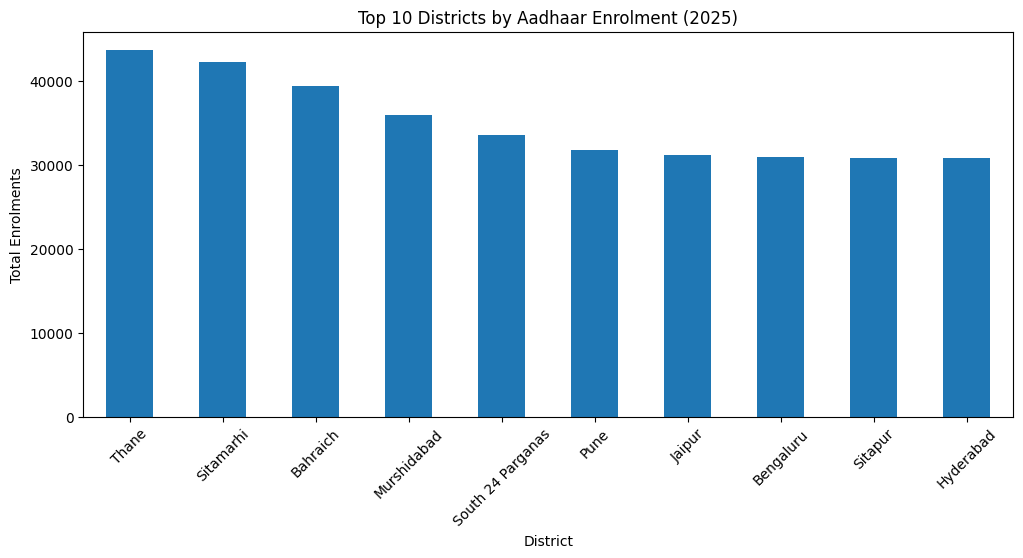

In [10]:
#Top 10 Districts by Enrolment

district_enrol = enrol_df.groupby('district')['total_enrolment'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
district_enrol.plot(kind='bar')
plt.title("Top 10 Districts by Aadhaar Enrolment (2025)")
plt.xlabel("District")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=45)
plt.show()


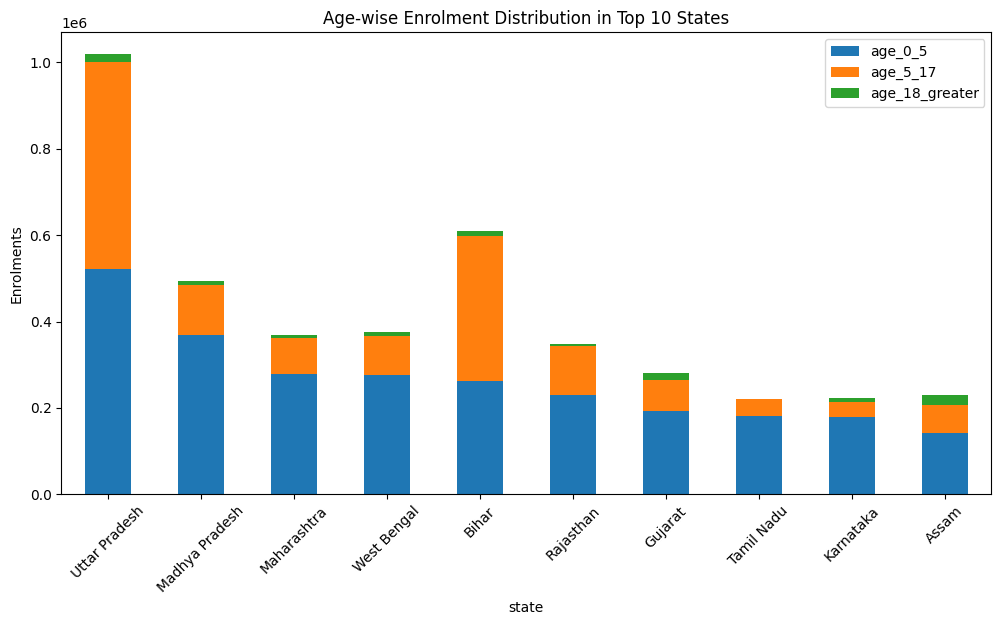

In [11]:
#Age Group Distribution by State (Stacked Bar)

state_age = enrol_df.groupby('state')[['age_0_5','age_5_17','age_18_greater']].sum().sort_values('age_0_5', ascending=False).head(10)

state_age.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Age-wise Enrolment Distribution in Top 10 States")
plt.ylabel("Enrolments")
plt.xticks(rotation=45)
plt.show()
